In [1]:
#import  important library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Load dataset
location = "DataNeuron_Text_Similarity.csv"
df = pd.read_csv(location) 

In [3]:
#lets see the head of CSV 
print(df.head())

                                               text1  \
0  broadband challenges tv viewing the number of ...   
1  rap boss arrested over drug find rap mogul mar...   
2  player burn-out worries robinson england coach...   
3  hearts of oak 3-2 cotonsport hearts of oak set...   
4  sir paul rocks super bowl crowds sir paul mcca...   

                                               text2  
0  gardener wins double in glasgow britain s jaso...  
1  amnesty chief laments war failure the lack of ...  
2  hanks greeted at wintry premiere hollywood sta...  
3  redford s vision of sundance despite sporting ...  
4  mauresmo opens with victory in la amelie maure...  


In [4]:
#lets print some basic details 

df.info()
print('-'*100)
print(df.describe())
print('-'*100)
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text1   3000 non-null   object
 1   text2   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB
----------------------------------------------------------------------------------------------------
                                                    text1  \
count                                                3000   
unique                                               1277   
top     stars pay tribute to actor davis hollywood sta...   
freq                                                    9   

                                                    text2  
count                                                3000  
unique                                               1256  
top     edwards tips idowu for euro gold world outdoor...  
freq                                                   12  
--

In [5]:
#rename the column 
df.rename(columns={'text1' : "Statement_1",
                  'text2' : "Statement_2"}, 
         inplace = True)

In [6]:
df

,Statement_1,Statement_2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...
...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...


In [7]:
#lets Check null value
df.isnull().sum()

Statement_1    0
Statement_2    0
dtype: int64

In [8]:
df

,Statement_1,Statement_2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...
...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...


In [9]:
#length of word in the data set each row

df['length_text_1'] = df["Statement_1"].apply( lambda x: len(x.split()))
df['length_text_2'] = df['Statement_2'].apply(lambda x: len(x.split()))




In [10]:
df

,Statement_1,Statement_2,length_text_1,length_text_2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,403,539
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,259,494
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,241,243
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,288,520
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,409,397
...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,272,283
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,194,258
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,127,253
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,309,381


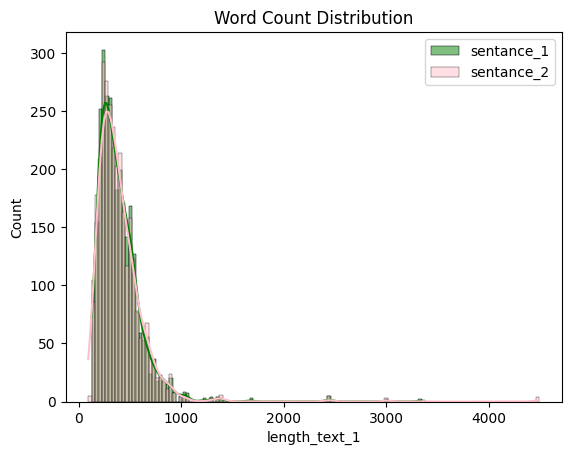

In [11]:
#visualize the number of length in graph 

sns.histplot(df['length_text_1'], kde= True , color = 'green' , label = "sentance_1")
sns.histplot(df['length_text_2'], kde= True , color = 'pink' , label = "sentance_2")
plt.legend()
plt.title('Word Count Distribution')
plt.show()

Hence we got to know from sentence 1 and sentance 2 , sentance 1 has more Length 

In [12]:
print('Total Sum of Sentance 1 ', sum(df ['length_text_1']))
print('Total Sum of Sentance 2 ', sum(df ['length_text_2']))

Total Sum of Sentance 1  1181348
Total Sum of Sentance 2  1195837


In [13]:
#unique word count in sentence 1 And 2 

df['unique_words_1'] = df['Statement_1'].apply(lambda x: list(set(str(x).split())))
df['unique_words_counts_1'] = df['unique_words_1'].apply(lambda x: len(x))
df['unique_words_2'] = df['Statement_2'].apply(lambda x: list(set(str(x).split())))
df['unique_words_counts_2'] = df['unique_words_2'].apply(lambda x: len(x))


In [14]:
df

,Statement_1,Statement_2,length_text_1,length_text_2,unique_words_1,unique_words_counts_1,unique_words_2,unique_words_counts_2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,403,539,"[subscription, radio, websites, france, had, s...",213,"[fading, brett, there, djhone, poor, points., ...",263
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,259,494,"[gang, coast, fuels, following, dre, californi...",149,"[system, public, if, suffering, confident, its...",239
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,241,243,"[if, football, names, there, funded, destroyin...",133,"[spirit, carol, gump, worked, star, celebrate,...",145
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,288,520,"[south, nfor, staged, cameroon, 35th, target.,...",156,"[system, if, documentary, 1980s., there, movie...",295
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,409,397,"[finally, football, red, causing, routine, min...",240,"[confident, season-ending, there, way., spot.,...",243
...,...,...,...,...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,272,283,"[cinema, following, director, dollar, meadows,...",156,"[if, isg, south, 50, steel, operations, annual...",167
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,194,258,"[present, star, had, when, 13, said., been, in...",123,"[finally, give, rating, there, banking, direct...",165
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,127,253,"[football, match-day, enter, steve, touchline,...",92,"[demands, south, liquefied, 2.4, corporation, ...",152
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,309,381,"[poll., public, eras, radio, covered, 50, idea...",184,"[spirit, football, if, give, there, star, came...",218


As Per the infomation get from the above dataset is the number of Unique words in every row 


In [15]:
#total Unique words in statement 1 and 2 

print("unique_words_counts_1 = ",sum(df["unique_words_counts_1"]))
print('unique_words_counts_2 = ',sum(df["unique_words_counts_2"]))

unique_words_counts_1 =  642346
unique_words_counts_2 =  645897


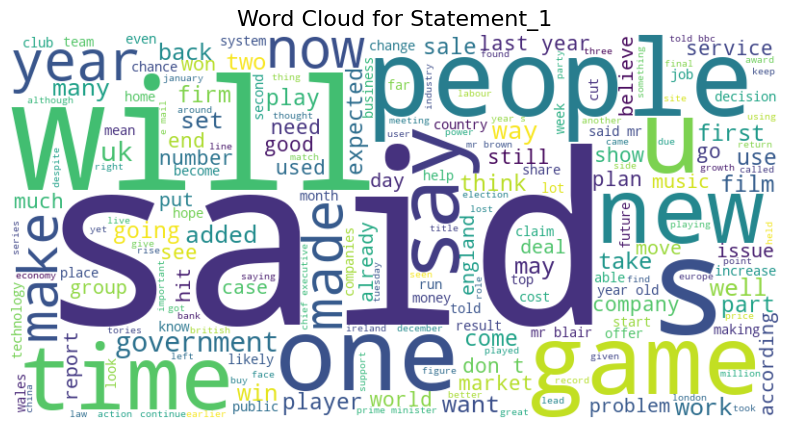

In [16]:
#Word Cloud statement 1 

# Combine all text in the 'Statement_1' column
text = ' '.join(df['Statement_1'].dropna().astype(str))

# Create and configure the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Statement_1', fontsize=16)
plt.show()


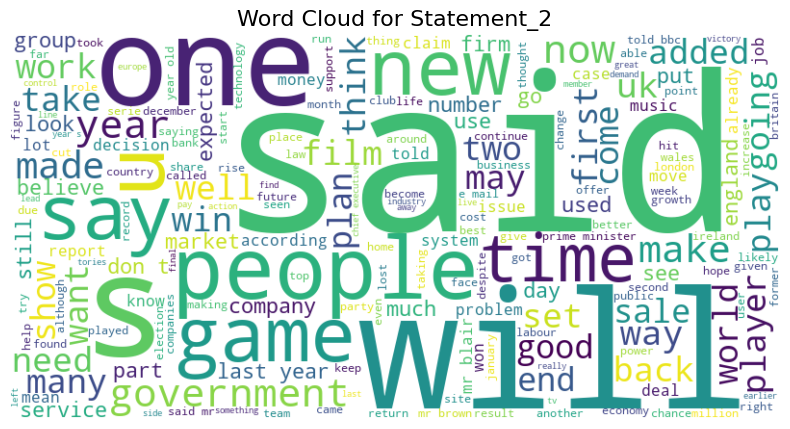

In [17]:
#Word Cloud Statement 2 


# Combine all text in the 'Statement_1' column
text = ' '.join(df['Statement_2'].dropna().astype(str))

# Create and configure the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Statement_2', fontsize=16)
plt.show()


The above 2 word Cloud shows that the most occuring words in Statement 1 and staetement 2 in the form of cloud.


In [18]:
#final DF 
df

,Statement_1,Statement_2,length_text_1,length_text_2,unique_words_1,unique_words_counts_1,unique_words_2,unique_words_counts_2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,403,539,"[subscription, radio, websites, france, had, s...",213,"[fading, brett, there, djhone, poor, points., ...",263
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,259,494,"[gang, coast, fuels, following, dre, californi...",149,"[system, public, if, suffering, confident, its...",239
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,241,243,"[if, football, names, there, funded, destroyin...",133,"[spirit, carol, gump, worked, star, celebrate,...",145
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,288,520,"[south, nfor, staged, cameroon, 35th, target.,...",156,"[system, if, documentary, 1980s., there, movie...",295
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,409,397,"[finally, football, red, causing, routine, min...",240,"[confident, season-ending, there, way., spot.,...",243
...,...,...,...,...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,272,283,"[cinema, following, director, dollar, meadows,...",156,"[if, isg, south, 50, steel, operations, annual...",167
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,194,258,"[present, star, had, when, 13, said., been, in...",123,"[finally, give, rating, there, banking, direct...",165
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,127,253,"[football, match-day, enter, steve, touchline,...",92,"[demands, south, liquefied, 2.4, corporation, ...",152
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,309,381,"[poll., public, eras, radio, covered, 50, idea...",184,"[spirit, football, if, give, there, star, came...",218


In [19]:
from collections import Counter

# Combine all text in the column into one string
text = ' '.join(df['Statement_1'].dropna().astype(str))

# Split into words
words = text.split()

# Count word frequencies
word_counts = Counter(words)

# Get the top N most common words
most_common_words = word_counts.most_common(10)  # Top 10 words

# Display
for word, count in most_common_words:
    print(f"{word}: {count}")

the: 71043
to: 34065
of: 26951
and: 25405
a: 24845
in: 23858
s: 12371
for: 11974
is: 11801
that: 10795


In [20]:
from collections import Counter

# Combine all text in the column into one string
text = ' '.join(df['Statement_2'].dropna().astype(str))

# Split into words
words = text.split()

# Count word frequencies
word_counts = Counter(words)

# Get the top N most common words
most_common_words = word_counts.most_common(10)  # Top 10 words

# Display
for word, count in most_common_words:
    print(f"{word}: {count}")

the: 72028
to: 34661
of: 27635
and: 25505
a: 24880
in: 24094
s: 12703
is: 12383
for: 12160
that: 11194


------------------------------Model Building------------------------------

In [21]:
#Text Preprocessing using TFIDF vectorizer 

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df['PreProcessed_Statement_1'] = df['Statement_1'].apply(preprocess)
df['PreProcessed_Statement_2'] = df['Statement_2'].apply(preprocess)

In [22]:
df

,Statement_1,Statement_2,length_text_1,length_text_2,unique_words_1,unique_words_counts_1,unique_words_2,unique_words_counts_2,PreProcessed_Statement_1,PreProcessed_Statement_2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,403,539,"[subscription, radio, websites, france, had, s...",213,"[fading, brett, there, djhone, poor, points., ...",263,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,259,494,"[gang, coast, fuels, following, dre, californi...",149,"[system, public, if, suffering, confident, its...",239,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,241,243,"[if, football, names, there, funded, destroyin...",133,"[spirit, carol, gump, worked, star, celebrate,...",145,player burnout worries robinson england coach ...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,288,520,"[south, nfor, staged, cameroon, 35th, target.,...",156,"[system, if, documentary, 1980s., there, movie...",295,hearts of oak 32 cotonsport hearts of oak set ...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,409,397,"[finally, football, red, causing, routine, min...",240,"[confident, season-ending, there, way., spot.,...",243,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...
...,...,...,...,...,...,...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,272,283,"[cinema, following, director, dollar, meadows,...",156,"[if, isg, south, 50, steel, operations, annual...",167,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,194,258,"[present, star, had, when, 13, said., been, in...",123,"[finally, give, rating, there, banking, direct...",165,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,127,253,"[football, match-day, enter, steve, touchline,...",92,"[demands, south, liquefied, 2.4, corporation, ...",152,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,309,381,"[poll., public, eras, radio, covered, 50, idea...",184,"[spirit, football, if, give, there, star, came...",218,belle named best scottish band belle sebast...,mido makes third apology ahmed mido hossam h...


In [39]:
#Feature Extraction (TF-IDF)


# Combine both texts
combined = pd.concat([df['PreProcessed_Statement_1'], df['PreProcessed_Statement_2']])
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(combined)

# Split again
text1_vectors = tfidf_matrix[:len(df)]
text2_vectors = tfidf_matrix[len(df):]

import pickle

# Save the fitted TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)



In [24]:
#finding Coseine similarity 
from sklearn.metrics.pairwise import cosine_similarity

similarities = []
for i in range(len(df)):
    similarity  = cosine_similarity(text1_vectors[i], text2_vectors[i])[0][0]
    similarities.append(round(similarity,2))


df['similarity_usiing_cosine'] = similarities 
print(df)

                                            Statement_1  \
0     broadband challenges tv viewing the number of ...   
1     rap boss arrested over drug find rap mogul mar...   
2     player burn-out worries robinson england coach...   
3     hearts of oak 3-2 cotonsport hearts of oak set...   
4     sir paul rocks super bowl crowds sir paul mcca...   
...                                                 ...   
2995  uk directors guild nominees named martin scors...   
2996  u2 to play at grammy awards show irish rock ba...   
2997  pountney handed ban and fine northampton coach...   
2998  belle named  best scottish band  belle & sebas...   
2999  criminal probe on citigroup deals traders at u...   

                                            Statement_2  length_text_1  \
0     gardener wins double in glasgow britain s jaso...            403   
1     amnesty chief laments war failure the lack of ...            259   
2     hanks greeted at wintry premiere hollywood sta...            24

In [25]:

#making simarity score using Cosin similarrity 


def get_similarity(text1, text2):
    text1 = preprocess(text1)
    text2 = preprocess(text2)
    vec1 = tfidf.transform([text1])
    vec2 = tfidf.transform([text2])
    sim = cosine_similarity(vec1, vec2)[0][0]
    return round(sim, 2)


In [26]:
get_similarity('how are you buddy ' , 'I am fine buddy ' )   #simarity based on cosine 

0.67

In [27]:
get_similarity('how are you buddy ' , 'how are you buddy ' )      #simarity based on cosine 

1.0

In [28]:
get_similarity('do yo know about national anthem ' , 'Yes Buddy I know About National Anthem ' )     #simarity based on cosine 

0.68

In [29]:
df

,Statement_1,Statement_2,length_text_1,length_text_2,unique_words_1,unique_words_counts_1,unique_words_2,unique_words_counts_2,PreProcessed_Statement_1,PreProcessed_Statement_2,similarity_usiing_cosine
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,403,539,"[subscription, radio, websites, france, had, s...",213,"[fading, brett, there, djhone, poor, points., ...",263,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,0.19
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,259,494,"[gang, coast, fuels, following, dre, californi...",149,"[system, public, if, suffering, confident, its...",239,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,0.06
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,241,243,"[if, football, names, there, funded, destroyin...",133,"[spirit, carol, gump, worked, star, celebrate,...",145,player burnout worries robinson england coach ...,hanks greeted at wintry premiere hollywood sta...,0.08
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,288,520,"[south, nfor, staged, cameroon, 35th, target.,...",156,"[system, if, documentary, 1980s., there, movie...",295,hearts of oak 32 cotonsport hearts of oak set ...,redford s vision of sundance despite sporting ...,0.12
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,409,397,"[finally, football, red, causing, routine, min...",240,"[confident, season-ending, there, way., spot.,...",243,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,0.10
...,...,...,...,...,...,...,...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,272,283,"[cinema, following, director, dollar, meadows,...",156,"[if, isg, south, 50, steel, operations, annual...",167,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,0.05
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,194,258,"[present, star, had, when, 13, said., been, in...",123,"[finally, give, rating, there, banking, direct...",165,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,0.09
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,127,253,"[football, match-day, enter, steve, touchline,...",92,"[demands, south, liquefied, 2.4, corporation, ...",152,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,0.04
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,309,381,"[poll., public, eras, radio, covered, 50, idea...",184,"[spirit, football, if, give, there, star, came...",218,belle named best scottish band belle sebast...,mido makes third apology ahmed mido hossam h...,0.10


In [30]:
new_df = df[['PreProcessed_Statement_1'	, 'PreProcessed_Statement_2',	'similarity_usiing_cosine']]

In [31]:
new_df

,PreProcessed_Statement_1,PreProcessed_Statement_2,similarity_usiing_cosine
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,0.19
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,0.06
2,player burnout worries robinson england coach ...,hanks greeted at wintry premiere hollywood sta...,0.08
3,hearts of oak 32 cotonsport hearts of oak set ...,redford s vision of sundance despite sporting ...,0.12
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,0.10
...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,0.05
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,0.09
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,0.04
2998,belle named best scottish band belle sebast...,mido makes third apology ahmed mido hossam h...,0.10


In [32]:
# Vectorize
vectorizer = TfidfVectorizer()
vectorizer.fit(pd.concat([df['PreProcessed_Statement_1'], df['PreProcessed_Statement_2']]))

vec1 = vectorizer.transform(df['PreProcessed_Statement_1'])
vec2 = vectorizer.transform(df['PreProcessed_Statement_2'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature: absolute difference between TF-IDF vectors
X = abs(vec1 - vec2)
y = new_df['similarity_usiing_cosine']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Try models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name} RMSE: {round(rmse, 4)}")


Linear Regression RMSE: 0.0329
Random Forest RMSE: 0.0393


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Features and target
X = abs(vec1 - vec2)
y = df['similarity_usiing_cosine']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    
}

# Training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name}: RMSE = {round(rmse*100, 4)}")


Linear Regression: RMSE = 3.4433
Ridge Regression: RMSE = 2.8652
Lasso Regression: RMSE = 4.703
ElasticNet: RMSE = 4.703
Decision Tree: RMSE = 5.3035
Random Forest: RMSE = 3.8518
Gradient Boosting: RMSE = 3.633
AdaBoost: RMSE = 4.6686
K-Nearest Neighbors: RMSE = 19.7033
Support Vector Regressor: RMSE = 7.3245


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler(with_mean=False)  # Important for sparse matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"KNN Regressor RMSE: {rmse:.4f}")


KNN Regressor RMSE: 0.2789


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Initialize the model
knn = KNeighborsRegressor()

# GridSearchCV setup
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Best model
best_knn = grid_search.best_estimator_
print("Best KNN Parameters:", grid_search.best_params_)

# Predict on test data
y_pred = best_knn.predict(X_test_scaled)

# Final RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Best KNN RMSE on test set: {rmse:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best KNN Parameters: {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN RMSE on test set: 0.0365


In [38]:
import pickle

# Save model
with open('best_knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)